Question 2.  Even after trying for so many times, your friend's startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend's startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

# Importing required libraries

In [2]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter



# Loading  and cleaning data

In [3]:
df = pd.read_csv("startup_funding.csv" , encoding = "UTF-8")

In [4]:
df.rename(columns = {'Date dd/mm/yyyy': "Date"} , inplace = True)
df.rename(columns = {'Startup Name': "StartupName"}, inplace = True)
df.rename(columns = {'Industry  Vertical':'IndustryVertical'}, inplace = True)
df.rename(columns = {'City  Location': "City"}, inplace = True)
df.rename(columns = {'Investors Name':"InvestorsName"}, inplace = True)
df.rename(columns = {'Amount in USD':'AmountInUSD'}, inplace = True)
df.rename(columns = {'InvestmentnType':'InvestmentType'}, inplace = True)

In [5]:
df.head()

,Sr No,Date,StartupName,Industry Vertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


# Solving Problem Statement

In [6]:
name = np.array(df.InvestorsName) # converting investors name into numpy array
# Investors name has multiple name in one row separated by "commas" and " and ", by using split() we can separate the name
invt = []
for i in name:
    x = str(i).split(', ')
    for j in x:
        y = j.split(' and ')
        for k in y:
            z = k.split(',')
            for p in z:
                if 'Undisclosed' not in p:
                    invt.append(p)
np_invt = np.array(invt)   
# storing the investors name and thier frequency of investments in the dictionary as key value pairs
dct = {}
for i in np_invt:
    if i in dct:
        dct[i] = dct[i] + 1
    else:
        dct[i] = 1
#sorting dictionary value wise in descending order,  key = lambda ele:ele[1]
sort_dict = {key: val for key, val in sorted(dct.items(), key = lambda ele:ele[1], reverse = True)}
# using counter  to extract top 5 investors
k = Counter(sort_dict)
top_5 = k.most_common(5)
index = []
count = []
for i in range(5):
    index.append(top_5[i][0])
    count.append(top_5[i][1])  

# Plotting Graph

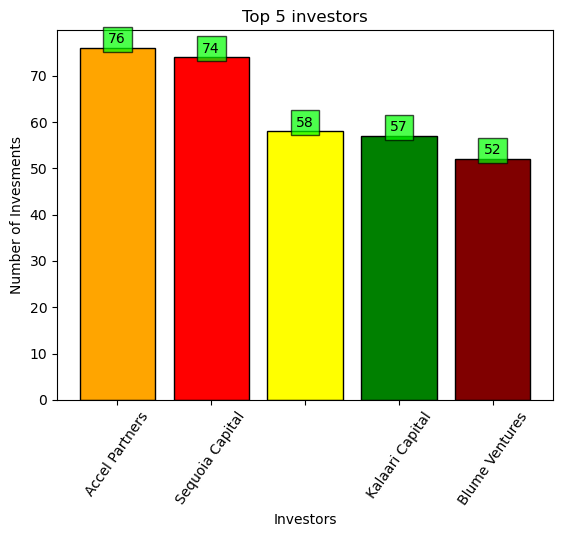

In [20]:
plt.bar(index , count , color = ["Orange" , "Red","Yellow", "green", "maroon"] , edgecolor = "black")
plt.xticks(rotation = 55)
plt.title("Top 5 investors")
plt.xlabel("Investors")
plt.ylabel("Number of Invesments")

for i in range(len(index)):
    plt.text(i , count[i]+1 , count[i] , ha = "center" , bbox = dict(facecolor = "lime" , alpha = 0.7))
    

plt.show()